<a href="https://colab.research.google.com/github/raechelt/Assignment1-Gaussian-Mixture-Model/blob/main/Tugas_2_Kelompok_F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  Tugas 2

Anggota Kelompok:
- Abdul Muhaimin (2106703052)
- Hanifah Sulasri (1906376810)
- Jesica Michele Yulianto (2106725002)
- Rachel Thyffani Margaretha Siahaan (2106726900)

In [ ]:
#mengimport module yang akan digunakan
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

#mengimport data iris
import pandas as pd
url = 'https://raw.githubusercontent.com/argyadiva/Assignment1-Gaussian-Mixture-Model/main/Iris.csv'
df=pd.read_csv(url)

In [ ]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


**PETAL**

In [ ]:
data2 = df[['PetalLengthCm','PetalWidthCm']]
print(data2)

     PetalLengthCm  PetalWidthCm
0              1.4           0.2
1              1.4           0.2
2              1.3           0.2
3              1.5           0.2
4              1.4           0.2
..             ...           ...
145            5.2           2.3
146            5.0           1.9
147            5.2           2.0
148            5.4           2.3
149            5.1           1.8

[150 rows x 2 columns]


1. Pendekatan K-Means Clustering

In [ ]:
#training k-means model
kmeans = KMeans(n_clusters = 4)
kmeans.fit(data2)

KMeans(n_clusters=4)

In [ ]:
#prediction from k-means
pred = kmeans.predict(data2)
frame = pd.DataFrame(data2)
frame['cluster'] = pred
frame.columns = ['PetalLengthCm','PetalWidthCm','cluster']

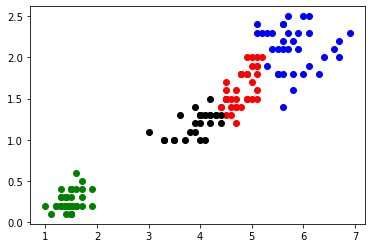

In [ ]:
#plotting results
color = ['blue','green','red', 'black']
for k in range(0,4):
    data2_1= frame[frame["cluster"]==k]
    plt.scatter(data2_1["PetalLengthCm"], data2_1["PetalWidthCm"],c=color[k])
plt.show()

2. Pendekatan GMM

In [ ]:
#training Gaussian model (normal distribution)
gmm = GaussianMixture(n_components = 4)
gmm.fit(data2)

GaussianMixture(n_components=4)

In [ ]:
#prediction from gmm
labels = gmm.predict(data2)
frame = pd.DataFrame(data2)
frame['cluster']= labels
frame.columns = ['PetalLengthCm','PetalWidthCm','cluster']

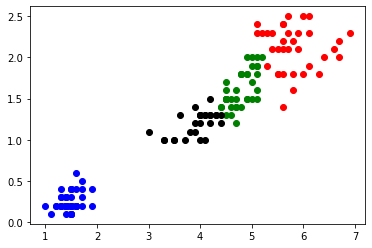

In [ ]:
color = ['blue','green','red', 'black']
for k in range(0,4):
    data2_2 = frame[frame["cluster"]==k]
    plt.scatter(data2_2["PetalLengthCm"], data2_2["PetalWidthCm"],c=color[k])
plt.show()

3. Pendekatan GMM EM

In [ ]:
#Contoh Pendekatan GMM dengan EM
# Contoh Mencoba GMM dengan jenis covarians yang berbeda pada data 2d
estimators = dict((cov_type, GaussianMixture(n_components=3,
                   covariance_type=cov_type, max_iter=20, random_state=0))
                  for cov_type in ['spherical', 'diag', 'tied', 'full'])
for (name,estimator) in estimators.items():
    estimator.fit(df.data[:,2:4]) ## fits mixture model menggunakan EM

In [ ]:
#Contoh Code Visualisasi GMM dengan EM dan tipe covariansi yang berbeda
for (name,gmm) in estimators.items():
    for n, color in enumerate(colors):
        data = df.data[iris.target == n]
        plt.scatter(data[:, 2], data[:, 3], marker=markers[n])
        if gmm.covariance_type == 'full':
            cov = gmm.covariances_[n]
        elif gmm.covariance_type == 'tied':
            cov = gmm.covariances_
        elif gmm.covariance_type == 'diag':
            cov = np.diag(gmm.covariances_[n])
        elif gmm.covariance_type == 'spherical':
            cov = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        #print(cov)
        pos = estimator.means_[n]
        #print(pos)
        plot_cov_ellipse(cov,pos,col=color)
    plt.title(name)
    plt.show()

**SEPAL**

In [ ]:
data1=df[["SepalLengthCm","SepalWidthCm"]]
print (data1)

     SepalLengthCm  SepalWidthCm
0              5.1           3.5
1              4.9           3.0
2              4.7           3.2
3              4.6           3.1
4              5.0           3.6
..             ...           ...
145            6.7           3.0
146            6.3           2.5
147            6.5           3.0
148            6.2           3.4
149            5.9           3.0

[150 rows x 2 columns]


1. Pendekatan K-Means Clustering

In [ ]:
# training k means model
kmeans = KMeans(n_clusters=4)
kmeans.fit(data1)

KMeans(n_clusters=4)

In [ ]:
# prediction from k means
pred = kmeans.predict(data1)
frame = pd.DataFrame(data1)
frame['cluster'] = pred
frame.columns = ['SepalLengthCm','SepalWidthCm','cluster']

IndexError: ignored

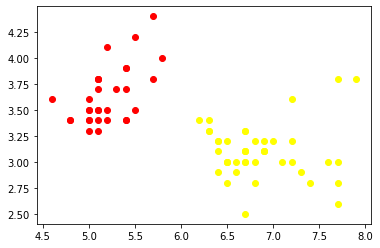

In [ ]:
# plotting results
color=['red','yellow',]
for k in range(0,4):
  data1 = frame[frame["cluster"]==k]
  plt.scatter(data1["SepalLengthCm"], data1["SepalWidthCm"], c=color[k])

plt.show()

2. Pendekatan GMM

In [ ]:
#tarining gaussian mixture model
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4)
gmm.fit(data1)

In [ ]:
#predictions from gmm
labels = gmm.predict(data1)
frame = pd.DataFrame(data1)
frame['cluster'] = labels
frame.columns = ['SepalLengthCm', 'SepalWidthCm', 'cluster']

In [ ]:
# plotting results
color=['red','yellow','black','blue']
for k in range(0,4):
  data1 = frame[frame["cluster"]==k]
  plt.scatter(data1["SepalLengthCm"], data1["SepalWidthCm"], c=color[k])

plt.show()

3. Pendekatan GMM EM

In [ ]:
#Contoh Pendekatan GMM dengan EM
# Contoh Mencoba GMM dengan jenis covarians yang berbeda pada data 2d
estimators = dict((cov_type, GaussianMixture(n_components=3,
                   covariance_type=cov_type, max_iter=20, random_state=0))
                  for cov_type in ['spherical', 'diag', 'tied', 'full'])
for (name,estimator) in estimators.items():
    estimator.fit(df.data[:,2:4]) ## fits mixture model menggunakan EM

In [ ]:
#Contoh Code Visualisasi GMM dengan EM dan tipe covariansi yang berbeda
for (name,gmm) in estimators.items():
    for n, color in enumerate(colors):
        data = df.data[iris.target == n]
        plt.scatter(data[:, 2], data[:, 3], marker=markers[n])
        if gmm.covariance_type == 'full':
            cov = gmm.covariances_[n]
        elif gmm.covariance_type == 'tied':
            cov = gmm.covariances_
        elif gmm.covariance_type == 'diag':
            cov = np.diag(gmm.covariances_[n])
        elif gmm.covariance_type == 'spherical':
            cov = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        #print(cov)
        pos = estimator.means_[n]
        #print(pos)
        plot_cov_ellipse(cov,pos,col=color)
    plt.title(name)
    plt.show()

NameError: ignored

K-Means Clustering adalah suatu metode penganalisaan data atau metode Data Mining yang melakukan proses pemodelan unssupervised learning dan menggunakan metode yang mengelompokan data berbagai partisi. Kelemahan utama dari algoritma K-Means adalah penggunaan nilai rata-rata untuk pusat cluster. Terkadang, perhitungan ini bukan cara terbaik untuk menentukan cluster. Cluster tidak bisa menangani cluster dengan radius berbeda yang berpusat pada rata-rata yang sama. K-Means tidak bisa menangani masalah ini karena nilai rata-rata dari cluster sangat berdekatan. Oleh karena itu, kita bisa menggunakan algoritma Expectation“Maximization (EM) Clustering using Gaussian Mixture Models (GMM) untuk menyelesaikan permasalahan tersebut. Algoritma ini memiliki dua kelebihan utama, pertama GMM jauh lebih fleksibel dalam hal kovarians. Keuda, GMM menggunakan probabilitas sehingga dapat memiliki beberapa cluster per titik data. Jadi jika sebuah titik data berada di tengah-tengah dua cluster yang saling tumpang tindih, kita dapat dengan mudah mengidentifikasi kelasnya dengan membandingkan persentasenya.

Dari plot di atas, dapat ditarik kesimpulan bahwa penggunaan k-means dan gmm pada petal memberikan hasil yang circular pada setiap cluster, dan penggunaan k-means dan gmm pada sepal memberikan hasil yang tersebar pada clusternya sehingga bisa dibilang sepal memiliki variansi yang besar.